#### Que. 1

    We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:
    
    1.fitting it to the periodic function
    
    2.plot the fit

Data :
    
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt

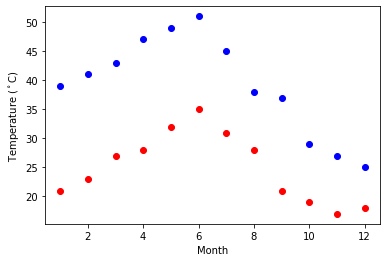

In [2]:

Max = np.array([ 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 ])
Min = np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 ])

months = np.arange(1,13)
plt.plot(months, Max,'bo')
plt.plot(months, Min, 'ro')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

In [3]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])

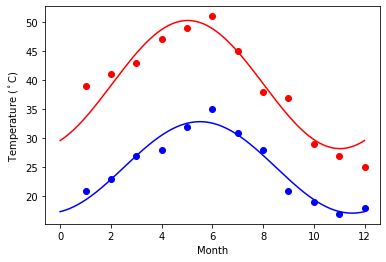

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


#### Que 2

This assignment is for visualization using matplotlib:

data to use:

url = https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

    1. Create a pie chart presenting the male/female proportion

    2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

titanic = pd.read_csv(url)

In [7]:
titanic.describe()


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [9]:
data = titanic['sex'].value_counts()

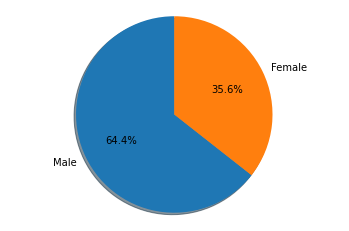

In [10]:
# Answer 1

labels = 'Male', 'Female'
sizes = [data[0],data[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

Text(0, 0.5, 'Fare')

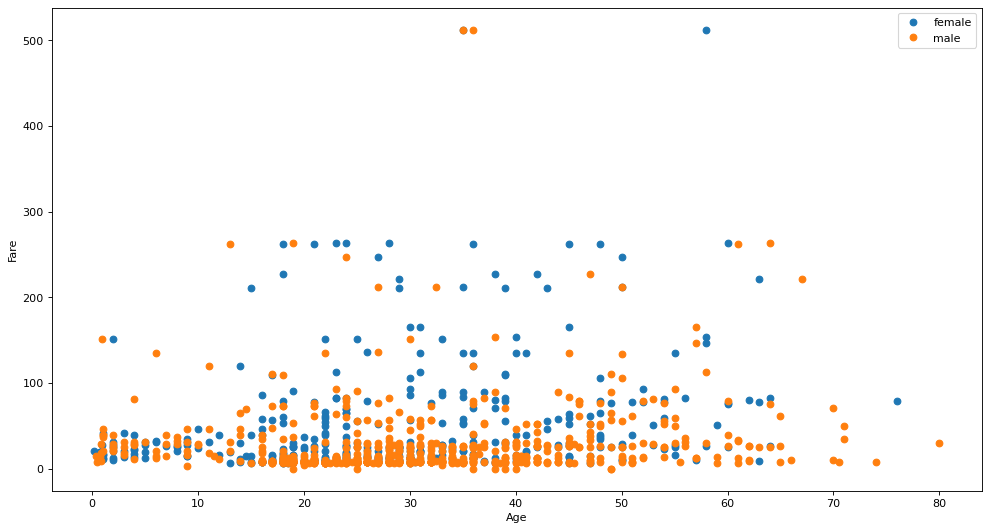

In [11]:
# Answer 2

plt.figure(figsize=(15, 8), dpi=80)

groups = titanic.groupby("sex")
for name, group in groups:
    plt.plot(group["age"], group["fare"], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare")